## Start the Docker container

### Run the following commands:
docker run -it --rm -p 8888:8888 -v /Users/sylvain/Data_Science/Kaggle/competition_titanic/datasets:/home/jovyan/datasets jupyter-server

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import matplotlib as plt

### Load the datasets

In [8]:
# Train dataset
df_train = pd.read_csv(
	filepath_or_buffer="datasets/train_clean.csv",
 index_col=0
)

# Test dataset
df_test = pd.read_csv(
	filepath_or_buffer="datasets/test_clean.csv",
 index_col=0
)

In [9]:
# create the features and target datasets
features = df_train.copy()
features.drop(labels="Survived", axis=1, inplace=True)
target = df_train.loc[:,"Survived"].copy()
# create the train and test datasets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

### Neural network

The best validation accuray is = 0.8878923654556274
The mean validation accuray is = 0.8744394779205322
The mean accuray is = 0.8545454561710357


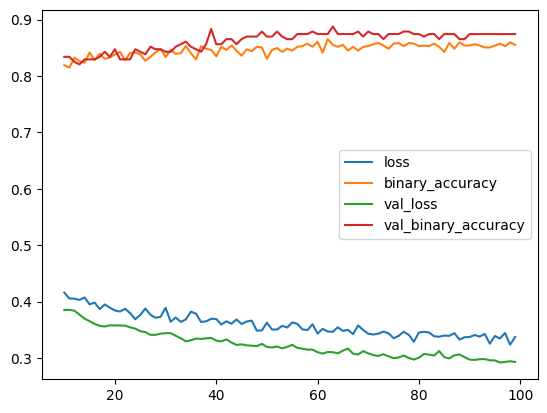

In [10]:
INPUT_SHAPE = [len(x_train.columns)]
X=features
Y=target
# x=x_train
# y=y_train

model = keras.Sequential([
	layers.Dense(units = 256, input_shape = INPUT_SHAPE, activation="relu"),
	# layers.BatchNormalization(),
	layers.Dropout(0.3),
 	layers.Dense(units = 512, activation="relu"),
	# layers.BatchNormalization(),
	layers.Dropout(0.3),
  	layers.Dense(units = 256, activation="relu"),
	# layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(units = 1, activation = "sigmoid")
])

model.compile(
	optimizer="adam",
	loss="binary_crossentropy",
	metrics=["binary_accuracy"],
)

early_stopping = EarlyStopping(
	patience = 50,
 	min_delta = 0.01,
	restore_best_weights = True,
)

# train the model
training_history = model.fit(
	x=X,
	y=Y,
	validation_data = (
		x_test,
		y_test,
	),
	batch_size = 256,
	epochs = 100,
 	callbacks = [early_stopping],
	verbose = False,
)

# see the training history
history_df = pd.DataFrame(training_history.history)
history_df.loc[10:,:].plot()
best_val_acc = history_df.loc[:,"val_binary_accuracy"].max()
print(f"The best validation accuray is = {best_val_acc}")
mean_val_acc = history_df.iloc[-10:,3].mean()
print(f"The mean validation accuray is = {mean_val_acc}")
mean_val_acc = history_df.iloc[-10:,1].mean()
print(f"The mean accuray is = {mean_val_acc}")

In [11]:
'''
The best validation accuray is = 0.878923773765564
The mean validation accuray is = 0.8739910423755646
The mean accuray is = 0.8562289535999298
'''

'\nThe best validation accuray is = 0.878923773765564\nThe mean validation accuray is = 0.8739910423755646\nThe mean accuray is = 0.8562289535999298\n'

<h3>Make a prediction for the competition</h3>

In [12]:
# Save the index
resDic = {"PassengerId": df_test.index}

# make the prediction
temp = model.predict(df_test)
pred = []
for arr in temp:
    pred.append(arr[0])
resDic["Survived"] = pred

# save it in a DataFrame
prediction = pd.DataFrame(data=resDic)

# make the prediction an integer
prediction.loc[:,"Survived"] = prediction.loc[:,"Survived"].apply(lambda x:round(x))

# save the prediction
prediction.to_csv(path_or_buf="datasets/prediction_NN.csv", index=False)

14/14 [==============================] - 0s 668us/step


/var/folders/sg/d2yjkd7s22zcny48m8_01qpm0000gn/T/ipykernel_44344/3783204013.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  prediction.loc[:,"Survived"] = prediction.loc[:,"Survived"].apply(lambda x:round(x))
